In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Training Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

### Building Model

In [5]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [6]:
model = Sequential()

## Building Convolution Layer

# To avoid the Overshooting Loss function
    1.Choose small learning rate, the default learning rate 0.001 here we have taken 0.0001
    2.There may be chance of underfitting so we increase number of neuron(1500)
    3.Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

In [7]:
model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu",input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation="relu",))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [8]:
model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
model.add(Conv2D(filters=64,kernel_size=3,activation="relu",))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [9]:
model.add(Conv2D(filters=128,kernel_size=3,padding="same",activation="relu"))
model.add(Conv2D(filters=128,kernel_size=3,activation="relu",))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=256,kernel_size=3,padding="same",activation="relu"))
model.add(Conv2D(filters=256,kernel_size=3,activation="relu"))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=512,kernel_size=3,padding="same",activation="relu"))
model.add(Conv2D(filters=512,kernel_size=3,activation="relu"))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [12]:
model.add(Dropout(0.25)) #to avoid overfitting

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(units=1500,activation='relu'))

In [15]:
model.add(Dropout(0.4))

In [16]:
#output layer
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

### Model Training

In [19]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 3407s 2s/step - loss: 1.3817 - accuracy: 0.5956 - val_loss: 0.5273 - val_accuracy: 0.8352
Epoch 2/10
2197/2197 [==============================] - 3246s 1s/step - loss: 0.4428 - accuracy: 0.8580 - val_loss: 0.3678 - val_accuracy: 0.8835
Epoch 3/10
2197/2197 [==============================] - 3232s 1s/step - loss: 0.2547 - accuracy: 0.9176 - val_loss: 0.2907 - val_accuracy: 0.9062
Epoch 4/10
2197/2197 [==============================] - 3246s 1s/step - loss: 0.1791 - accuracy: 0.9413 - val_loss: 0.1759 - val_accuracy: 0.9425
Epoch 5/10
2197/2197 [==============================] - 3316s 2s/step - loss: 0.1301 - accuracy: 0.9572 - val_loss: 0.1223 - val_accuracy: 0.9604
Epoch 6/10
2197/2197 [==============================] - 3325s 2s/step - loss: 0.1078 - accuracy: 0.9651 - val_loss: 0.1184 - val_accuracy: 0.9639
Epoch 7/10
2197/2197 [==============================] - 3334s 2s/step - loss: 0.0847 - accuracy: 0.9727 - val_loss: 0.1463 -

### Model Evaluation

In [21]:
##Model evaluation on Traning set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 1139s 518ms/step - loss: 0.0498 - accuracy: 0.9847


In [22]:
print(train_loss,train_acc)

0.049809180200099945 0.9846930503845215


In [23]:
val_loss, val_acc = model.evaluate(validation_set)

550/550 [==============================] - 284s 509ms/step - loss: 0.1598 - accuracy: 0.9545


In [24]:
print(val_loss, val_acc)

0.15979839861392975 0.9545299410820007


In [25]:
##Saving Model

In [26]:
model.save("trained_model.keras")

In [27]:
training_history.history #Return Dictionary of history

{'loss': [1.3817267417907715,
  0.4427999258041382,
  0.25472649931907654,
  0.17909634113311768,
  0.1300681084394455,
  0.10776814073324203,
  0.08465971797704697,
  0.07014581561088562,
  0.06099604815244675,
  0.05593649670481682],
 'accuracy': [0.5956326723098755,
  0.8580126762390137,
  0.9175901412963867,
  0.9413329362869263,
  0.9571804404258728,
  0.965118408203125,
  0.9727149605751038,
  0.9776228666305542,
  0.980482280254364,
  0.9817910194396973],
 'val_loss': [0.5273341536521912,
  0.36776936054229736,
  0.29065683484077454,
  0.17594203352928162,
  0.12231647968292236,
  0.11839067190885544,
  0.14625483751296997,
  0.15629205107688904,
  0.13008078932762146,
  0.15979833900928497],
 'val_accuracy': [0.8351923227310181,
  0.8834509253501892,
  0.9061574935913086,
  0.9424653053283691,
  0.9604484438896179,
  0.963862955570221,
  0.954359233379364,
  0.9522535800933838,
  0.9631800651550293,
  0.9545299410820007]}

In [28]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

### Accuracy Visulization

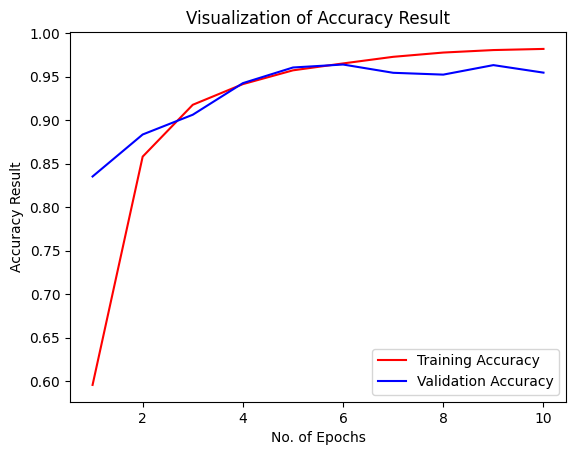

In [60]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel("Accuracy Result")
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [47]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [48]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [49]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 268s 472ms/step


(array([[9.9996132e-01, 3.8436297e-05, 3.5501735e-10, ..., 2.0003090e-15,
         3.6917436e-14, 2.7251926e-13],
        [9.9331015e-01, 6.5742573e-03, 2.0325766e-08, ..., 1.5692106e-11,
         6.9029539e-11, 1.4727474e-09],
        [9.9965560e-01, 2.9174858e-04, 8.0901039e-08, ..., 4.5165998e-12,
         2.5448105e-11, 2.9235476e-09],
        ...,
        [5.4007061e-14, 3.5754163e-16, 2.4835193e-13, ..., 9.1325890e-15,
         2.7689639e-14, 1.0000000e+00],
        [3.2177056e-11, 5.3798367e-13, 3.3854222e-11, ..., 8.0981064e-12,
         4.0007568e-12, 9.9999976e-01],
        [3.3586135e-16, 6.8117045e-18, 1.6042183e-16, ..., 2.7073495e-18,
         4.8801036e-16, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [50]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [51]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [52]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [53]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [54]:
from sklearn.metrics import confusion_matrix,classification_report

In [55]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.90      0.94       504
                                 Apple___Black_rot       0.92      1.00      0.96       497
                          Apple___Cedar_apple_rust       1.00      0.82      0.90       440
                                   Apple___healthy       0.93      0.95      0.94       502
                               Blueberry___healthy       0.98      0.95      0.96       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.92      0.96       421
                 Cherry_(including_sour)___healthy       0.98      0.96      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.90      0.93       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.96      0.

In [57]:
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

(38, 38)

### Confusion Matrix Visulization

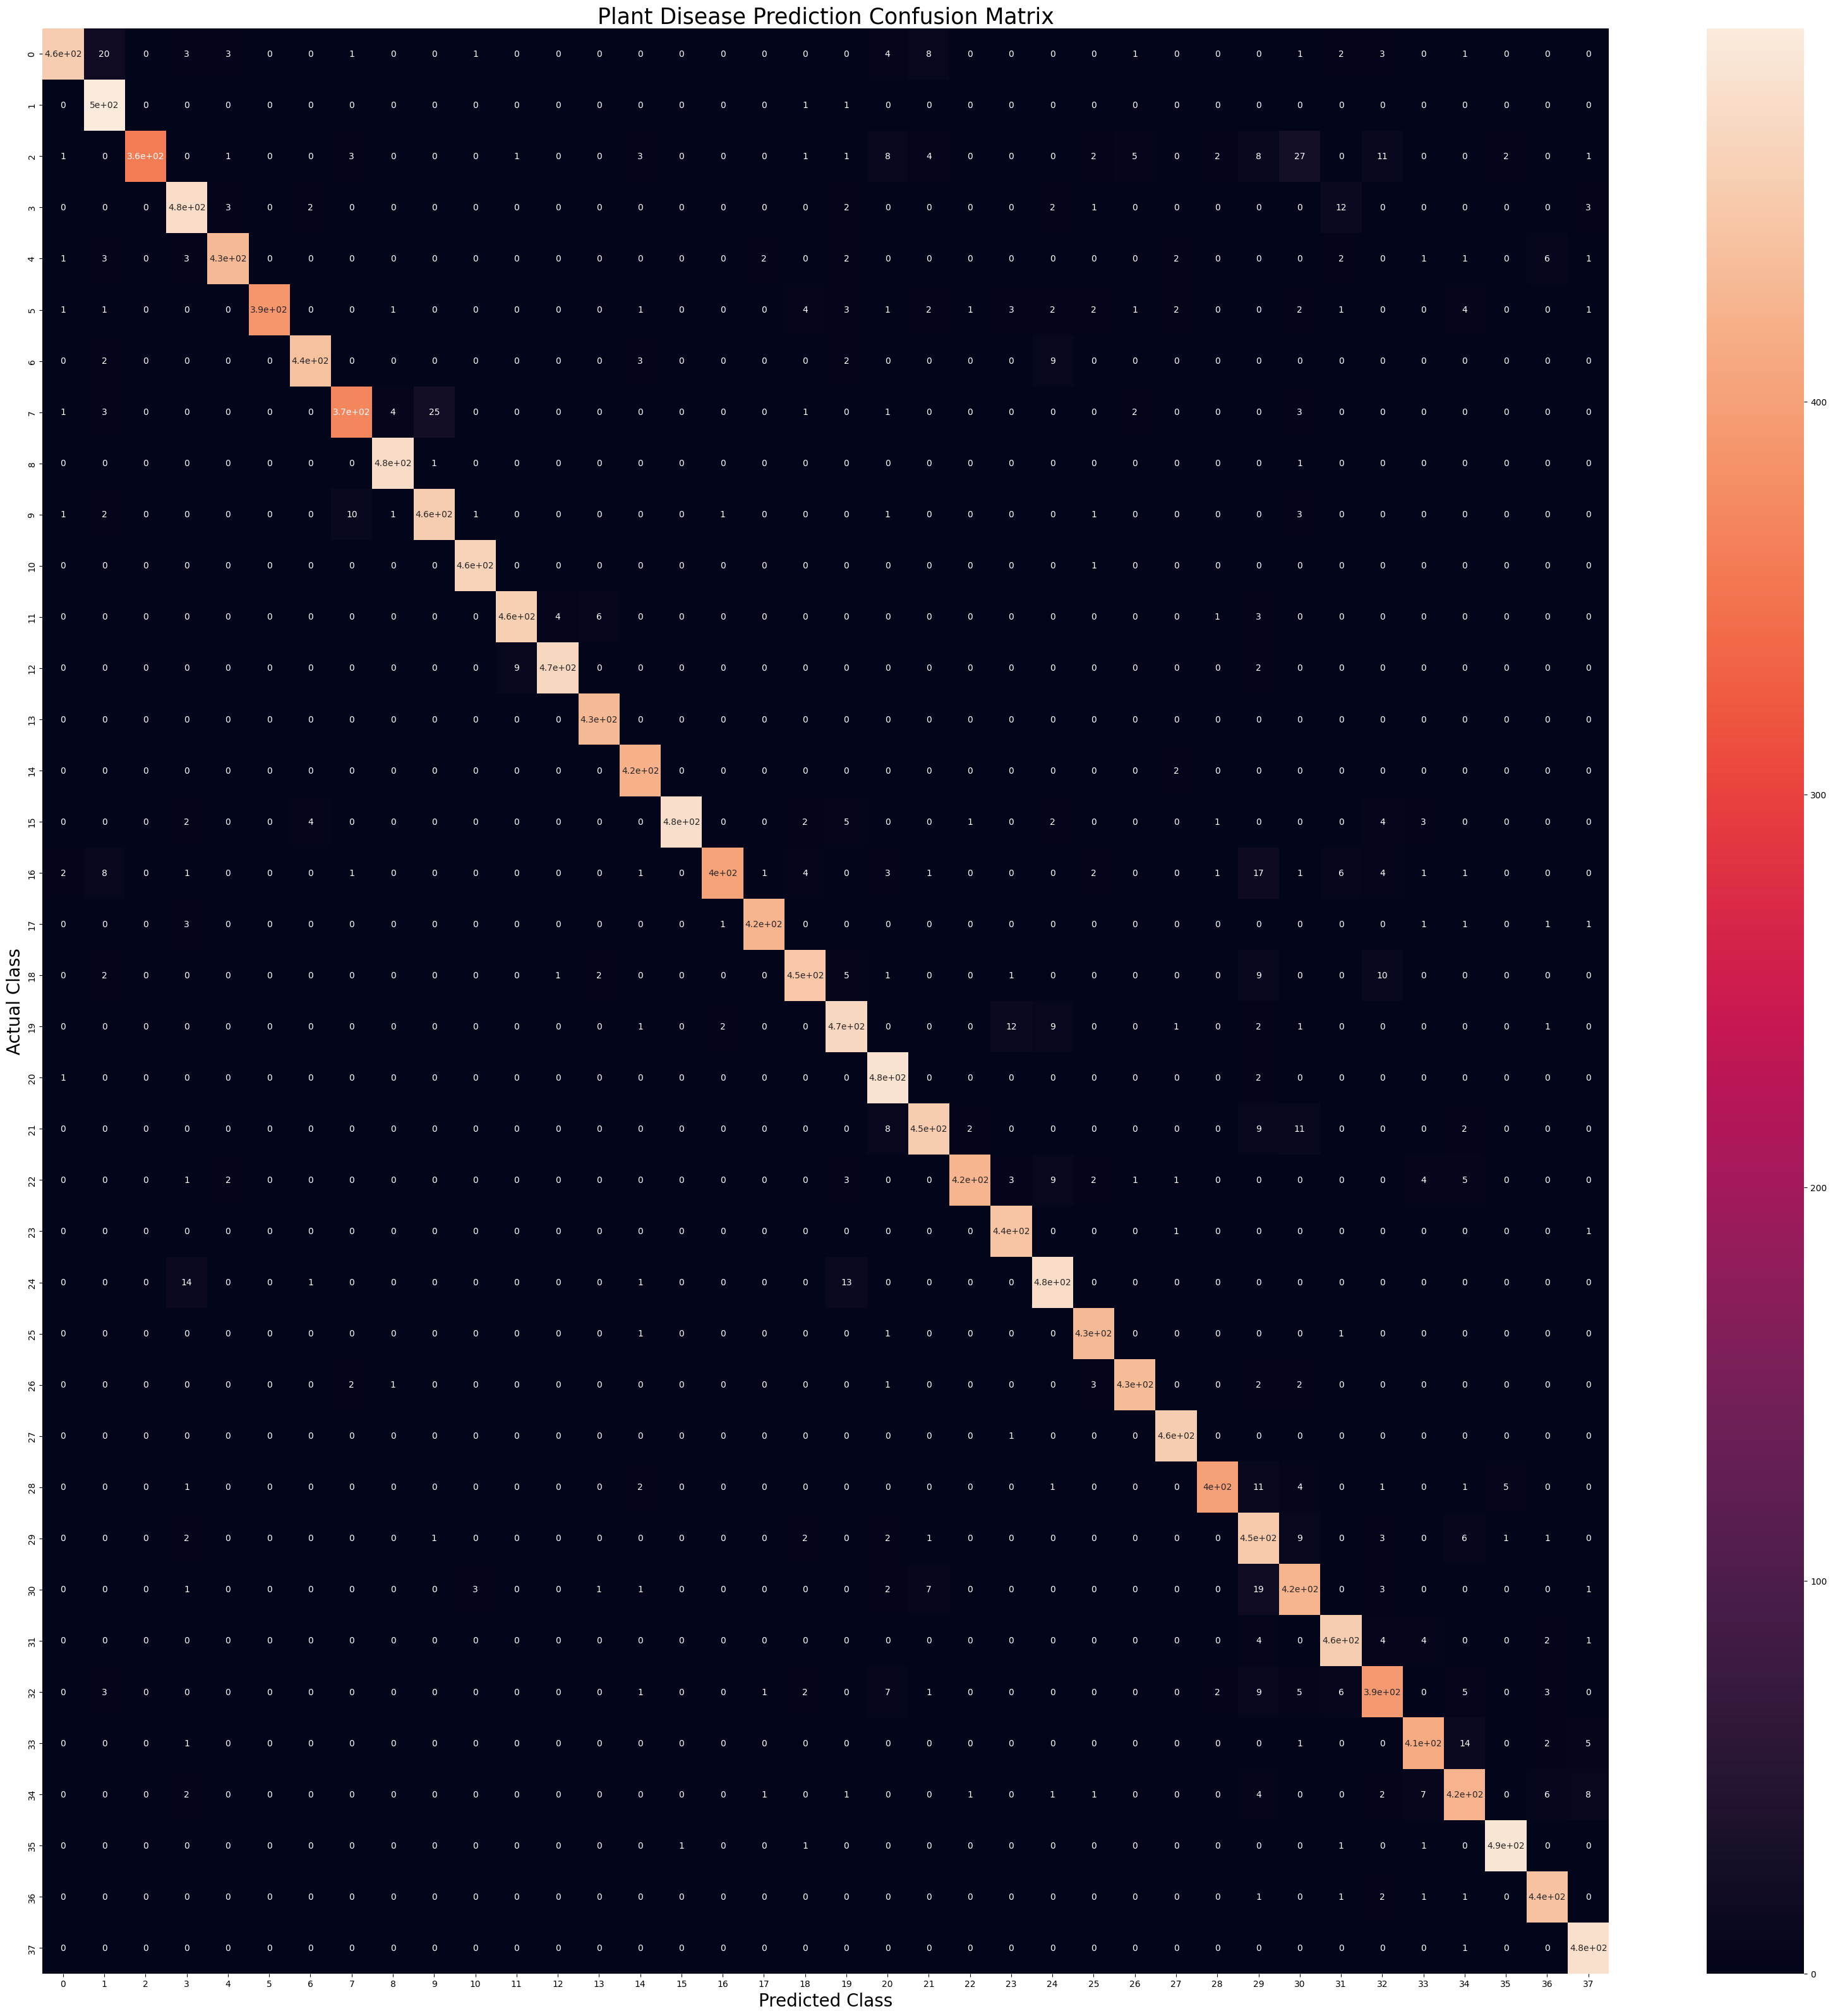

In [58]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()